# Import Packages and Data

In [1]:
# Import Packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# Linear Regression
from sklearn.linear_model import LinearRegression

# Model Scoring/Data Prep
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats import kurtosis


In [2]:
# Import Data
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\DSDP\\Ames\\"

df = pd.read_csv(str(filepath)+"AmesHousing.csv")

# Feature Creation

In [3]:
# Fill this area with created columns

# Modeling

## Column Preparation for Modeling

In [4]:
# Get a list of the columns in the dataframe
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
# Lists to modify for appropriate columns

# List of IVs
independent = ['Full Bath', 'Fireplaces', 'Roof Style']

# Target Variable
target = ['SalePrice']

# Columns to dummy code
dummy_code_columns = ['Roof Style']

Subset specific independent variables and dependent variable for modeling

In [6]:
# Subset dataset to only columns for modeling.
X = df[independent]
y = df[target]
y.columns = ['Target']

Dummy code categorical variables

In [7]:
# This will DROP the original column and create dummies for categorical variables

for col in dummy_code_columns:
    X = pd.get_dummies(X, columns=[col])
    X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)

Train, Test Split the training data for modeling

In [8]:
# Train,Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Linear Regression

In [9]:
# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Add predictions to test dataset
y_test['Prediction'] = regressor.predict(X_test)

# Create residuals
y_test['Residual'] = y_test['Target'] -y_test['Prediction']

# Model Diagnostics

Global Accuracy Table

In [10]:
# Plot global model accuracy metrics
from python_packages.Continuous_Model import Continuous_Accuracy_Table as t

t.accuracy_table(X_test, y_test['Target'],y_test['Prediction'])

,Measure,Value
0,MSE,3.762042e+09
1,RMSE,6.133548e+04
2,R2,4.577300e-01
3,Adj R2,4.533719e-01


Summary Table

In [11]:
# Plot summary table of coefficients
from python_packages.Linear_Regression import Linear_Regression_Summary_Table as t

t.summary_table(regressor, X_test.columns)

,Feature Name,Coefficient
0,Intercept,65119.404955
1,Full Bath,63235.578081
2,Fireplaces,43114.829925
3,Roof Style_Flat,-23459.409251
4,Roof Style_Gable,-16772.665567
5,Roof Style_Gambrel,-28531.920307
6,Roof Style_Hip,23525.483985
7,Roof Style_Mansard,-28819.560183


Model Diagnostic Plots

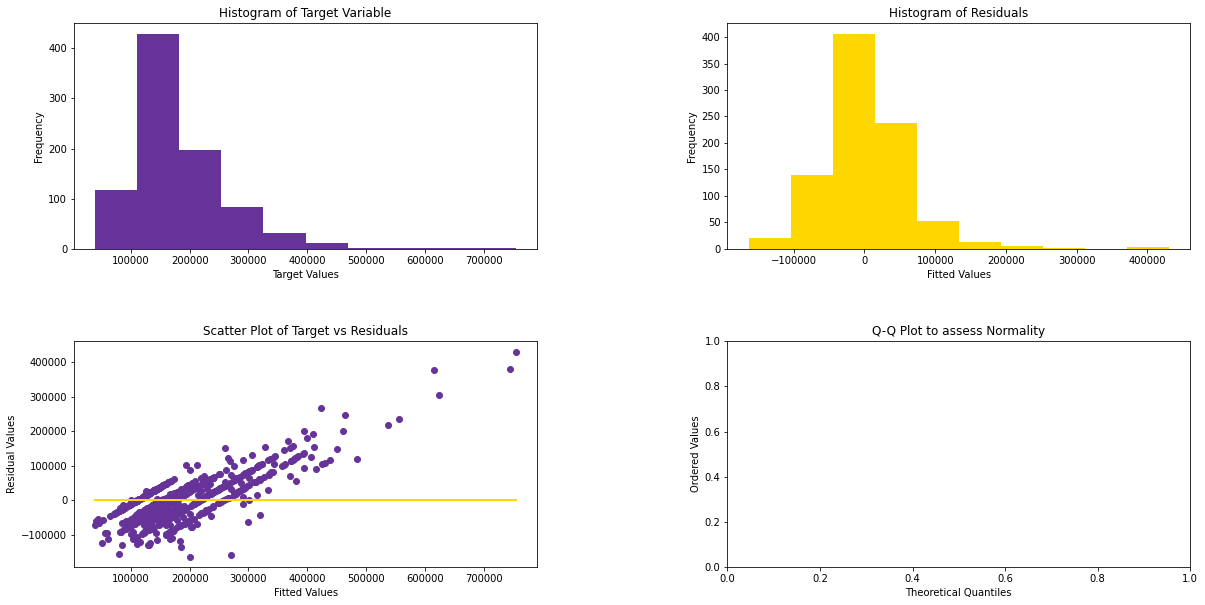

In [12]:
# Model Diagnostic Plots
from python_packages.Linear_Regression import Linear_Regression_Diagnostic_Plots as t
t.create_diagnostic_plots(y_test['Target'],y_test['Residual'])

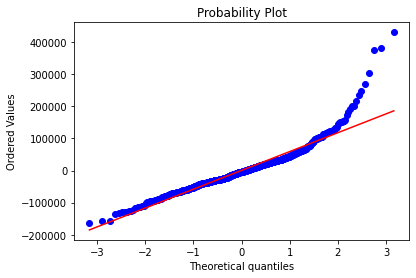

In [13]:
# QQ Plot
plot=sp.stats.probplot(y_test['Residual'], dist="norm", plot=plt)

# Send Model Results to File

In [14]:
# [Run] Make sure to modify the file name!!!!!

# Use this if you want to export any data

#filename_submission = 'Linear_Model_Results.csv'
#data = y_test

#data.to_csv(filepath+filename_submission, sep=',', index = False)